In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#from scipy import stats
#from scipy.stats import norm, skew
#from scipy.special import boxcox1p
#from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [4]:
#loading the data to a Pandas DataFrame
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#checking the shape
data.shape

(284807, 31)

In [6]:
#checking the datatypes and null/non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#checking ditribution of the variables in the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#checking the class distribution of the target variable
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
#checking the % distribution of legit vs. fraud transactions
classes=data['Class'].value_counts()
legit_perc=classes[0]/data['Class'].count()*100
print(legit_perc)
fraud_perc=classes[1]/data['Class'].count()*100
print(fraud_perc)

99.82725143693798
0.1727485630620034


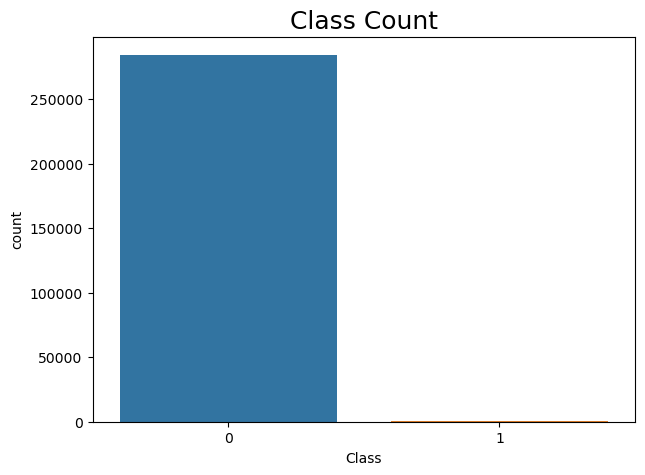

In [10]:
#create a bar plot for the number of legit and fraudulent transactions
plt.figure(figsize=(7,5))
sns.countplot(data['Class'])
plt.title("Class Count", fontsize=18)
plt.show()

In [11]:
#checking for correlation
corr=data.corr()
corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447


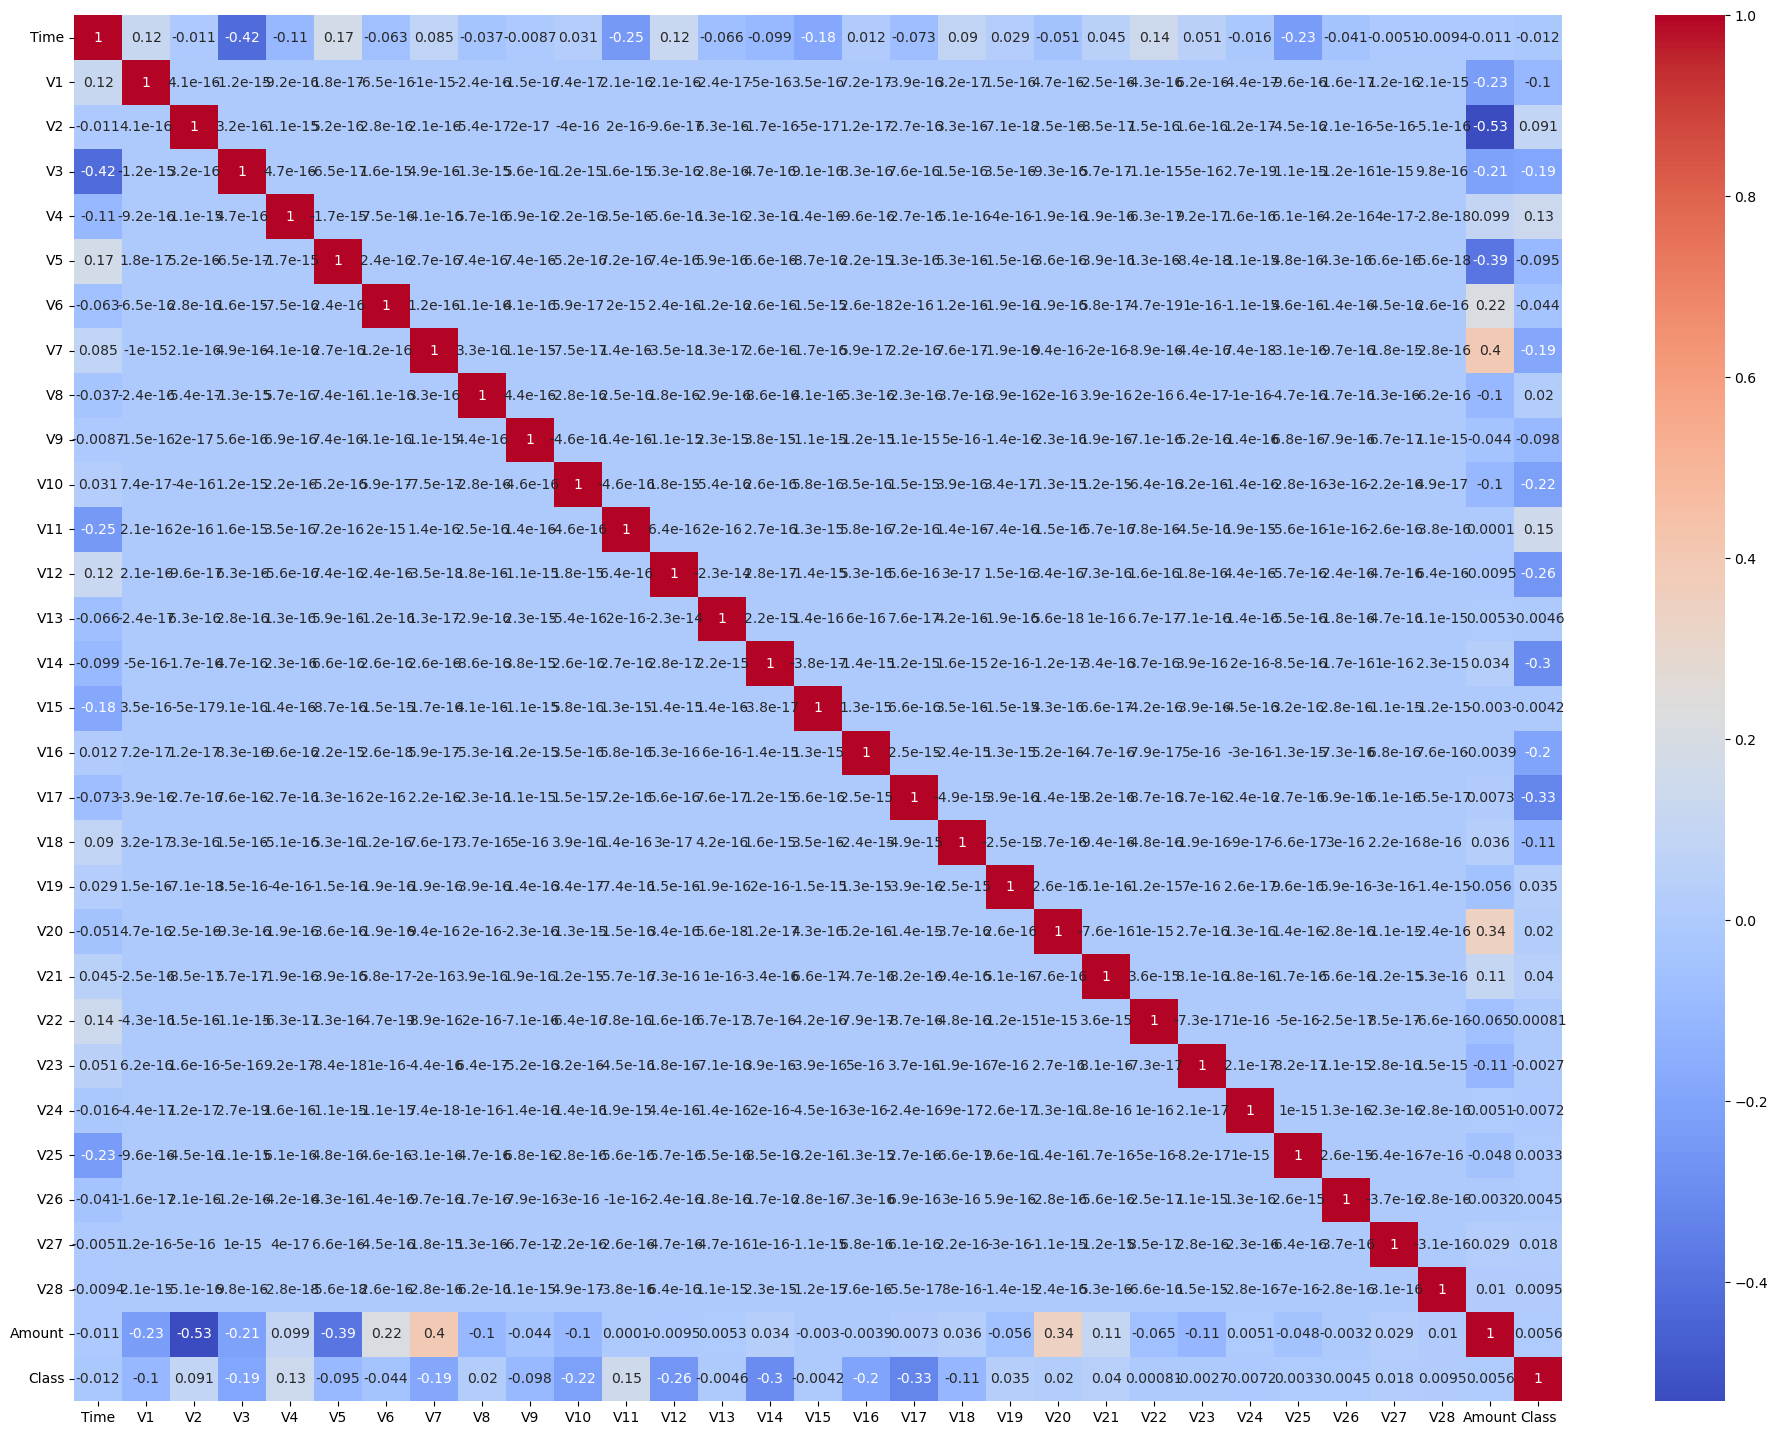

In [12]:
#visualizing the correlation in a heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap="coolwarm",annot=True)
plt.show()

In [13]:
#feature engineering
Delta_Time=pd.to_timedelta(data['Time'],unit='s')

data['Day']=(Delta_Time.dt.components.days).astype(int)
data['Hour']=(Delta_Time.dt.components.hours).astype(int)
data['Min']=(Delta_Time.dt.components.minutes).astype(int)

In [14]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Day,Hour,Min
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1,23,59
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1,23,59
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1,23,59
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1,23,59
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,1,23,59


In [15]:
#let's drop the Time column as we have featured engineer it to Days, Hours and Minutes
data.drop('Time', axis=1, inplace = True)

#let's drop days and minutes
data.drop(['Day', 'Min'], axis=1, inplace=True)

## Splitting into train and test sets

In [16]:
#splitting the dataset into X and Y
Y=data['Class']
X=data.drop(['Class'],axis=1)

In [17]:
#splitting into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


In [18]:
print(np.sum(Y))
print(np.sum(Y_train))
print(np.sum(Y_test))

492
396
96


In [19]:
#store the col names in a variable
cols=list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Hour']

## Model Building

In [20]:
#create a dataframe to store results
results=pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','Threshold'])

In [21]:
#create a common function to plot confusion matrix
def Plot_confusion_matrix(Y_test,pred_test):
    cm=confusion_matrix(Y_test, pred_test)
    plt.clf()
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Accent)
    categoryNames=['Legit','Fraud']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    s=[['TN','FP'],['FN','TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
            #plt.text(str(cm[i][j]), fontsize=12)
    plt.show()

In [22]:
#Logistic Regression using L1 and L2
def Logisticmodel(results, Methodology, X_train, X_test, Y_train, Y_test):
    
    #LogisticRegression
    from sklearn import linear_model
    from sklearn.model_selection import KFold
    
    num_C = list(np.power(10.0, np.arange(-10,10)))
    cv_num=KFold(n_splits=10, shuffle=True, random_state=42)
    
    searchCV_l2 = linear_model.LogisticRegressionCV(
            Cs=num_C,
            penalty='l2',
            scoring='roc_auc',
            cv=cv_num,
            random_state=42,
            max_iter=10000,
            fit_intercept=True,
            solver='newton-cg',
            tol=10
    )
    
    searchCV_l1 = linear_model.LogisticRegressionCV(
            Cs=num_C,
            penalty='l1',
            scoring='roc_auc',
            cv=cv_num,
            random_state=42,
            max_iter=10000,
            fit_intercept=True,
            solver='liblinear',
            tol=10
    )
        
    searchCV_l1.fit(X_train, Y_train)
    searchCV_l2.fit(X_train, Y_train)
    #print('Max auc_roc for l1: ', searchCV_l1.scores_[1].mean(axis=0).max())
    #print('Max auc_roc for l2: ', searchCV_l2.scores_[1].mean(axis=0).max())
    
    #print("Parameters for l1 regularisations")
    #print(searchCV_l1.coef_)
    #print(searchCV_l1.intercept_)
    #print(searchCV_l1.scores_)
    
    #print("Parameters for l2 regularisations")
    #print(searchCV_l2.coef_)
    #print(searchCV_l2.intercept_)
    #print(searchCV_l2.scores_)
    
    #find predicted values
    y_pred_l1=searchCV_l1.predict(X_test)
    y_pred_l2=searchCV_l2.predict(X_test)
    
    #Accuracy of L2/L1 models
    Accuracy_l1=metrics.accuracy_score(y_pred=y_pred_l1, y_true=Y_test)
    Accuracy_l2=metrics.accuracy_score(y_pred=y_pred_l2, y_true=Y_test)
    
    print("Accuracy of Logistic model with L1 regularisation: {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(Y_test, y_pred_l1)
    print("Classification Report")
    print(classification_report(Y_test,y_pred_l1))
    
    print("Accuracy of Logistic model with L2 regularisation: {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(Y_test, y_pred_l2)
    print("Classification Report")
    print(classification_report(Y_test,y_pred_l2))
    
    #find predicted probabilities
    y_pred_probs_l1=searchCV_l1.predict_proba(X_test)[:,1]
    y_pred_probs_l2=searchCV_l2.predict_proba(X_test)[:,1]
    
    l1_roc=roc_auc_score(Y_test, y_pred_probs_l1)
    print("L1 roc_value: {0}".format(l1_roc))
    fpr, tpr, thresholds=metrics.roc_curve(Y_test, y_pred_probs_l1)
    threshold=thresholds[np.argmax(tpr-fpr)]
    print('L1 threshold: {0}'.format(threshold))
    
    results=results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L1 regularisation', 'Accuracy': Accuracy_l1, 'roc_value':l1_roc, 'Threshold': threshold}, index=[0]), ignore_index=True)
    
    l2_roc=roc_auc_score(Y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}".format(l2_roc))
    fpr, tpr, thresholds=metrics.roc_curve(Y_test, y_pred_probs_l2)
    threshold=thresholds[np.argmax(tpr-fpr)]
    print('L2 threshold: {0}'.format(threshold))
    
    results=results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Logistic Regression with L2 regularisation', 'Accuracy': Accuracy_l2, 'roc_value':l2_roc, 'Threshold': threshold}, index=[0]), ignore_index=True)
    return results

In [23]:
#KNN model
def KNNmodel(results, Methodology, X_train, X_test, Y_train, Y_test):
    
    knn=KNeighborsClassifier(n_neighbors=5,n_jobs=16)
    knn.fit(X_train, Y_train)
    #score=knn.score(X_test, Y_test)
    #print("model score")
    #print(score)
    
    #Accuracy
    y_pred=knn.predict(X_test)
    KNN_Accuracy=metrics.accuracy_score(y_pred,Y_test)
    print("Confusion Matrix")
    Plot_confusion_matrix(Y_test,y_pred)
    print("Classification report")
    print(classification_report(Y_test, y_pred))
    
    knn_probs=knn.predict_proba(X_test)[:,1]
    
    #calculate roc_auc
    knn_roc=roc_auc_score(Y_test,knn_probs)
    print("KNN roc_value: {0}".format(knn_roc))
    fpr, tpr, thresholds=metrics.roc_curve(Y_test, knn_probs)
    threshold=thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))
    
    results=results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'KNN', 'Accuracy': KNN_Accuracy, 'roc_value':knn_roc, 'Threshold': threshold}, index=[0]), ignore_index=True)
    
    return results

In [24]:
#Tree model using gini and entropy criteria
def Treemodel(results, Methodology, X_train, X_test, Y_train, Y_test):
    criteria={'gini','entropy'}
    scores={}
    
    for c in criteria:
        dt=DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, Y_train)
        y_pred=dt.predict(X_test)
        #test_score=dt.score(X_test, Y_test)
        test_score=metrics.accuracy_score(y_pred,Y_test)
        #tree_preds=dt.predict_proba(X_test)[:,1]
        #tree_roc_value=roc_auc_score(Y_test,tree_preds)
        #scores=test_score
        #print(c+"score: {0}".format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(Y_test,y_pred)
        print("Classification report")
        print(classification_report(Y_test, y_pred))
        
        tree_preds=dt.predict_proba(X_test)[:,1]
        
        tree_roc_value=roc_auc_score(Y_test,tree_preds)
        print(c+"tree_roc_value: {0}".format(tree_roc_value))
        fpr, tpr, thresholds=metrics.roc_curve(Y_test, tree_preds)
        threshold=thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))

        results=results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Tree Model with {0} criteria'.format(c), 'Accuracy': test_score, 'roc_value':tree_roc_value, 'Threshold': threshold}, index=[0]), ignore_index=True)
    return results

In [25]:
#Random forest model 
def RandomForestmodel(results, Methodology, X_train, X_test, Y_train, Y_test):
    
        RF_model=RandomForestClassifier(n_estimators=100, bootstrap=True,max_features='sqrt', random_state=42)
        RF_model.fit(X_train, Y_train)
        rf_predictions=RF_model.predict(X_test)
        #RF_model.predict(X_test)
        #RF_test_score=RF_model.score(X_test, Y_test)
        RF_test_score=metrics.accuracy_score(rf_predictions,Y_test)
        #print('Model Accuracy: {0}'.format(RF_test_score))
        #rf_predictions=RF_model.predict(X_test)
        
        print("Confusion Matrix")
        Plot_confusion_matrix(Y_test,rf_predictions)
        print("Classification report")
        print(classification_report(Y_test, rf_predictions))
        
        rf_probs=RF_model.predict_proba(X_test)[:,1]
        
        roc_value=roc_auc_score(Y_test,rf_probs)
        print("Random_Forest_roc_value: {0}".format(roc_value))
        fpr, tpr, thresholds=metrics.roc_curve(Y_test,rf_probs)
        threshold=thresholds[np.argmax(tpr-fpr)]
        print("Random Forest threshold: {0}".format(threshold))

        results=results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Random Forest', 'Accuracy': RF_test_score, 'roc_value':roc_value, 'Threshold': threshold}, index=[0]), ignore_index=True)
        return results

In [26]:
#XGBoost model 
def XGBoostmodel(results, Methodology, X_train, X_test, Y_train, Y_test):
    
        XGB_model=XGBClassifier(n_estimators=100, bootstrap=True,max_features='sqrt', random_state=42)
        XGB_model.fit(X_train, Y_train)
        y_pred=XGB_model.predict(X_test)
        #XGB_test_score=XGB_model.score(X_test, Y_test)
        #print('Model Accuracy: {0}'.format(XGB_test_score))
        XGB_test_score=metrics.accuracy_score(y_pred, Y_test)
        
        print("Confusion Matrix")
        Plot_confusion_matrix(Y_test,y_pred)
        print("Classification report")
        print(classification_report(Y_test, y_pred))
        
        XGB_probs=XGB_model.predict_proba(X_test)[:,1]
        
        XGB_roc_value=roc_auc_score(Y_test,XGB_probs)
        print("XGBoost_roc_value: {0}".format(XGB_roc_value))
        fpr, tpr, thresholds=metrics.roc_curve(Y_test,XGB_probs)
        threshold=thresholds[np.argmax(tpr-fpr)]
        print("XGBoost threshold: {0}".format(threshold))

        results=results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'XGBoost', 'Accuracy': XGB_test_score, 'roc_value':XGB_roc_value, 'Threshold': threshold}, index=[0]), ignore_index=True)
        return results

In [27]:
#SVM model 
def SVMmodel(results, Methodology, X_train, X_test, Y_train, Y_test):
        from sklearn.svm import SVC
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import roc_auc_score
    
        clf=SVC(kernel='sigmoid', random_state=42)
        clf.fit(X_train, Y_train)
        y_pred_SVM=clf.predict(X_test)
        SVM_score=metrics.accuracy_score(Y_test,y_pred_SVM)
        #print('Model Accuracy: {0}'.format(SVM_score))
        
        print("Confusion Matrix")
        Plot_confusion_matrix(Y_test,y_pred_SVM)
        print("Classification report")
        print(classification_report(Y_test, y_pred_SVM))
        
        classifier=SVC(kernel='sigmoid', probability=True)
        SVM_probs=classifier.fit(X_train,Y_train).predict_proba(X_test)[:,1]
        
        roc_value=roc_auc_score(Y_test,SVM_probs)
        print("SVM_roc_value: {0}".format(roc_value))
        fpr, tpr, thresholds=metrics.roc_curve(Y_test,SVM_probs)
        threshold=thresholds[np.argmax(tpr-fpr)]
        print("SVM threshold: {0}".format(threshold))

        results=results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'SVM', 'Accuracy': SVM_score, 'roc_value':roc_value, 'Threshold': threshold}, index=[0]), ignore_index=True)
        return results

## Cross Validation with RepeatedKFold

In [28]:
from sklearn.model_selection import RepeatedKFold
rkf=RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

#X is the feature set and Y is the target
for train_index, test_index in rkf.split(X,Y):
    print("Train:",train_index, "test:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index],X.iloc[test_index]
    Y_train_cv, Y_test_cv= Y.iloc[train_index], Y.iloc[test_index]

Train: [     0      1      2 ... 284804 284805 284806] test: [     8      9     13 ... 284793 284797 284802]
Train: [     0      1      2 ... 284803 284805 284806] test: [     7     10     18 ... 284798 284801 284804]
Train: [     6      7      8 ... 284804 284805 284806] test: [     0      1      2 ... 284785 284788 284800]
Train: [     0      1      2 ... 284802 284804 284805] test: [     6     12     16 ... 284799 284803 284806]
Train: [     0      1      2 ... 284803 284804 284806] test: [    15     25     31 ... 284789 284794 284805]
Train: [     1      2      4 ... 284803 284804 284805] test: [     0      3     10 ... 284796 284801 284806]
Train: [     0      1      2 ... 284801 284803 284806] test: [    18     24     28 ... 284802 284804 284805]
Train: [     0      1      2 ... 284804 284805 284806] test: [     4      5     11 ... 284789 284794 284803]
Train: [     0      1      3 ... 284804 284805 284806] test: [     2      7     14 ... 284792 284795 284800]
Train: [     0     

Logistic regression
Accuracy of Logistic model with L1 regularisation: 0.9991222064219378
Confusion Matrix


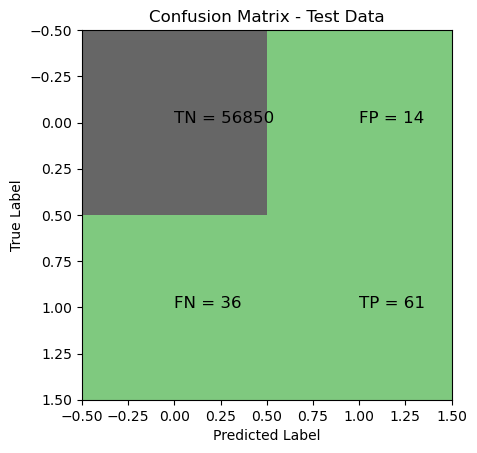

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.63      0.71        97

    accuracy                           1.00     56961
   macro avg       0.91      0.81      0.85     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L2 regularisation: 0.9991748740366215
Confusion Matrix


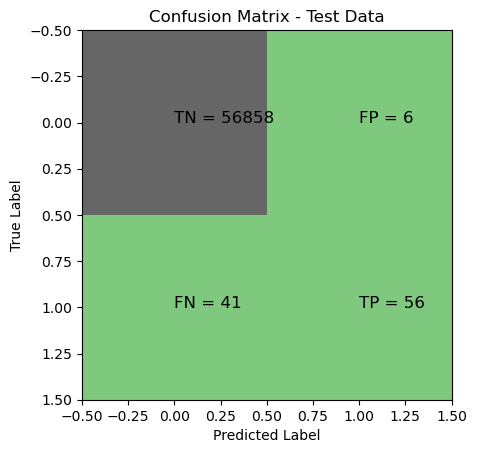

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.58      0.70        97

    accuracy                           1.00     56961
   macro avg       0.95      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961

L1 roc_value: 0.9187477156565276
L1 threshold: 0.05433256577079348
l2 roc_value: 0.9864032613172902
L2 threshold: 0.002159881925281085
time taken by model: ---253.77068495750427 seconds ---
------------------------------------------------------------


In [29]:
#Logistic regression with l1 and L2 regularisation
print("Logistic regression")
start_time=time.time()
results=Logisticmodel(results,"RepeatedKFold Cross validation",X_train_cv,X_test_cv,Y_train_cv,Y_test_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)


KNN Model
Confusion Matrix


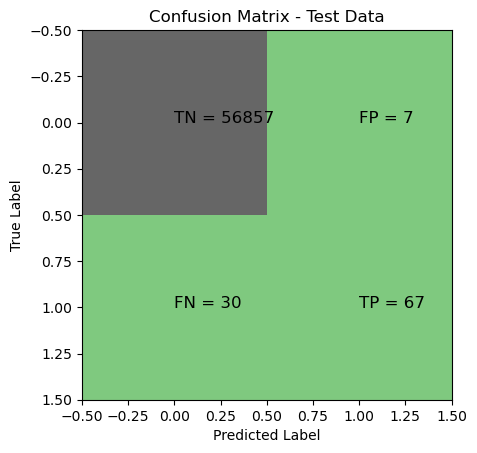

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.69      0.78        97

    accuracy                           1.00     56961
   macro avg       0.95      0.85      0.89     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.907029668182794
KNN threshold: 0.2
time taken by model: ---836.8386940956116 seconds ---
------------------------------------------------------------


In [30]:

#KNN model
print("KNN Model")
start_time=time.time()
results=KNNmodel(results,"RepeatedKFold Cross validation",X_train_cv,X_test_cv,Y_train_cv,Y_test_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)


Decision Tree Model
Confusion Matrix


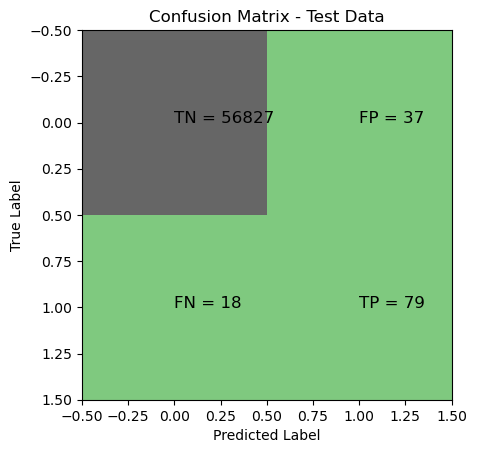

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.81      0.74        97

    accuracy                           1.00     56961
   macro avg       0.84      0.91      0.87     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.90689115719764
Tree threshold: 1.0
Confusion Matrix


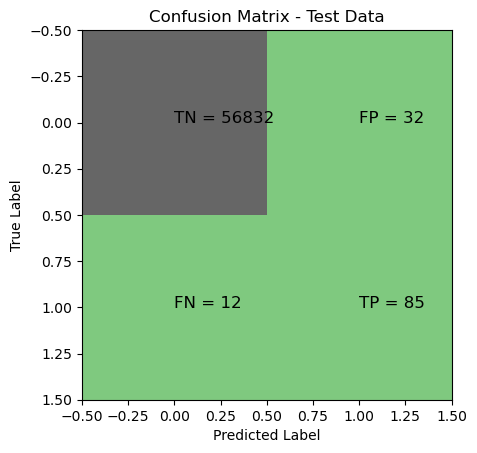

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.88      0.79        97

    accuracy                           1.00     56961
   macro avg       0.86      0.94      0.90     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.9378629567961757
Tree threshold: 1.0
time taken by model: ---34.22591161727905 seconds ---
------------------------------------------------------------


In [31]:
#Decision Tree models with gini and entropy
print("Decision Tree Model")
start_time=time.time()
results=Treemodel(results,"RepeatedKFold Cross validation",X_train_cv,X_test_cv,Y_train_cv,Y_test_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)


Random Forest Model
Confusion Matrix


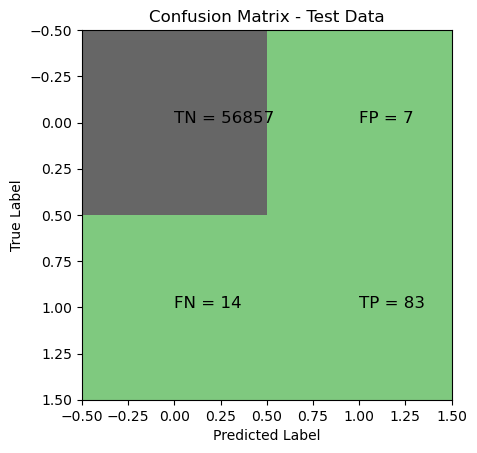

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.86      0.89        97

    accuracy                           1.00     56961
   macro avg       0.96      0.93      0.94     56961
weighted avg       1.00      1.00      1.00     56961

Random_Forest_roc_value: 0.9730480103730949
Random Forest threshold: 0.01
time taken by model: ---222.0734977722168 seconds ---
------------------------------------------------------------


In [32]:
#Random forest model
print("Random Forest Model")
start_time=time.time()
results=RandomForestmodel(results,"RepeatedKFold Cross validation",X_train_cv,X_test_cv,Y_train_cv,Y_test_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)

XGBoost Model
Confusion Matrix


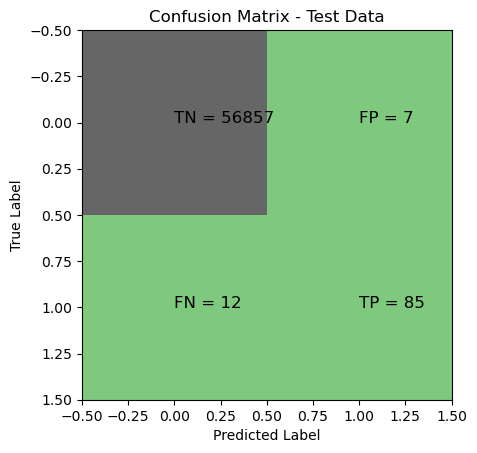

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.88      0.90        97

    accuracy                           1.00     56961
   macro avg       0.96      0.94      0.95     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost_roc_value: 0.9833531188902878
XGBoost threshold: 0.000243738031713292
time taken by model: ---2.5672123432159424 seconds ---
------------------------------------------------------------


In [33]:
#XGBoost model
print("XGBoost Model")
start_time=time.time()
results=XGBoostmodel(results,"RepeatedKFold Cross validation",X_train_cv,X_test_cv,Y_train_cv,Y_test_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)


SVM Model
Confusion Matrix


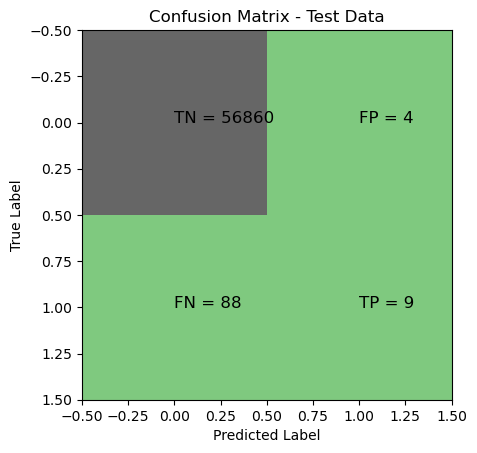

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.09      0.16        97

    accuracy                           1.00     56961
   macro avg       0.85      0.55      0.58     56961
weighted avg       1.00      1.00      1.00     56961

SVM_roc_value: 0.5132847263719114
SVM threshold: 0.0030331539541725706
time taken by model: ---297.91373443603516 seconds ---
------------------------------------------------------------


In [34]:
#SVM model
print("SVM Model")
start_time=time.time()
results=SVMmodel(results,"RepeatedKFold Cross validation",X_train_cv,X_test_cv,Y_train_cv,Y_test_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)

In [35]:
#checking the results dataframe
results

,Methodology,Model,Accuracy,roc_value,Threshold
0,RepeatedKFold Cross validation,Logistic Regression with L1 regularisation,0.999122,0.918748,0.054333
1,RepeatedKFold Cross validation,Logistic Regression with L2 regularisation,0.999175,0.986403,0.002160
2,RepeatedKFold Cross validation,KNN,0.999350,0.907030,0.200000
3,RepeatedKFold Cross validation,Tree Model with gini criteria,0.999034,0.906891,1.000000
4,RepeatedKFold Cross validation,Tree Model with entropy criteria,0.999228,0.937863,1.000000
5,RepeatedKFold Cross validation,Random Forest,0.999631,0.973048,0.010000
6,RepeatedKFold Cross validation,XGBoost,0.999666,0.983353,0.000244
7,RepeatedKFold Cross validation,SVM,0.998385,0.513285,0.003033


## Cross-validation using Stratified K-Fold 

In [36]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=None)

#X is the feature set and Y is the target
for train_index, test_index in skf.split(X,Y):
    print("Train:",train_index, "test:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index],X.iloc[test_index]
    Y_train_SKF_cv, Y_test_SKF_cv= Y.iloc[train_index], Y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] test: [212516 212644 213092 ... 284804 284805 284806]


Logistic regression
Accuracy of Logistic model with L1 regularisation: 0.9987535331191517
Confusion Matrix


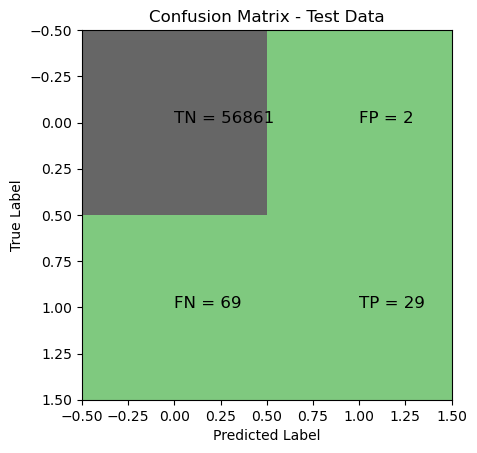

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L2 regularisation: 0.998771088990713
Confusion Matrix


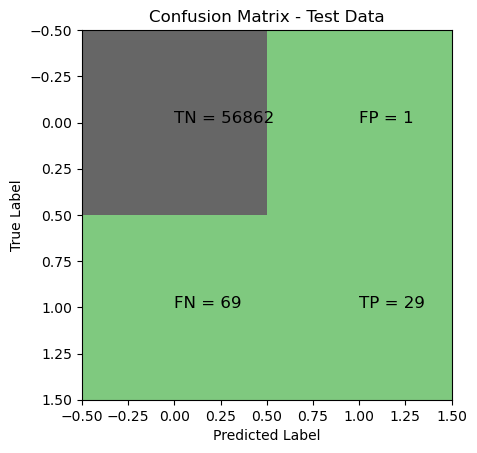

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

L1 roc_value: 0.8890758561483437
L1 threshold: 0.021087492766199856
l2 roc_value: 0.9834231003482412
L2 threshold: 0.0015423627352377
time taken by model: ---235.23105597496033 seconds ---
------------------------------------------------------------


In [37]:
#Logistic regression with l1 and L2 regularisation
print("Logistic regression")
start_time=time.time()
results=Logisticmodel(results,"StratifiedKFold Cross validation",X_train_SKF_cv,X_test_SKF_cv,Y_train_SKF_cv,Y_test_SKF_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)

KNN Model
Confusion Matrix


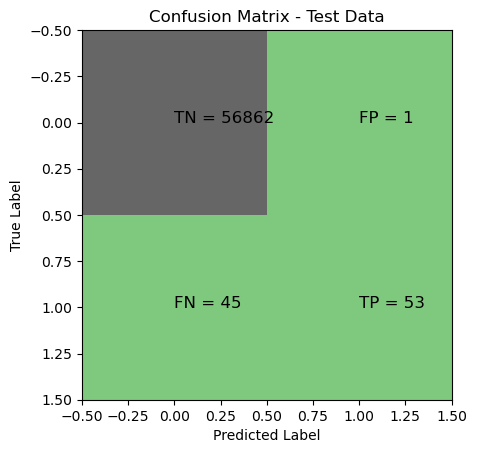

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
time taken by model: ---2144.5526316165924 seconds ---
------------------------------------------------------------


In [38]:
#KNN model
print("KNN Model")
start_time=time.time()
results=KNNmodel(results,"StratifiedKFold Cross validation",X_train_SKF_cv,X_test_SKF_cv,Y_train_SKF_cv,Y_test_SKF_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)


Decision Tree Model
Confusion Matrix


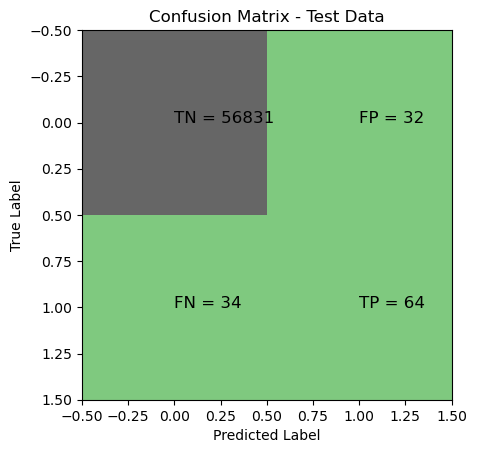

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8262492341959029
Tree threshold: 1.0
Confusion Matrix


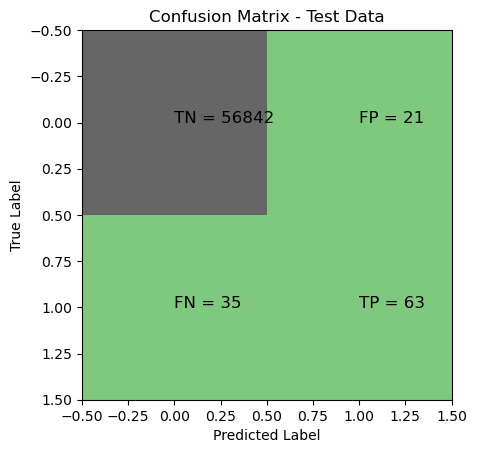

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8212439170839185
Tree threshold: 1.0
time taken by model: ---55.916887283325195 seconds ---
------------------------------------------------------------


In [39]:
#Decision Tree models with gini and entropy
print("Decision Tree Model")
start_time=time.time()
results=Treemodel(results,"StratifiedKFold Cross validation",X_train_SKF_cv,X_test_SKF_cv,Y_train_SKF_cv,Y_test_SKF_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)


Random Forest Model
Confusion Matrix


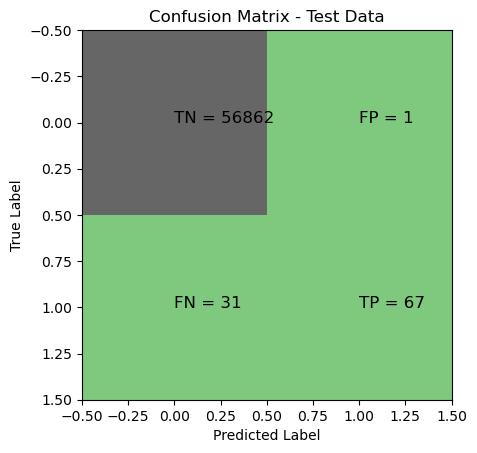

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random_Forest_roc_value: 0.9464721329855826
Random Forest threshold: 0.01
time taken by model: ---347.1726679801941 seconds ---
------------------------------------------------------------


In [40]:
#Random forest model
print("Random Forest Model")
start_time=time.time()
results=RandomForestmodel(results,"StratifiedKFold Cross validation",X_train_SKF_cv,X_test_SKF_cv,Y_train_SKF_cv,Y_test_SKF_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)


XGBoost Model
Confusion Matrix


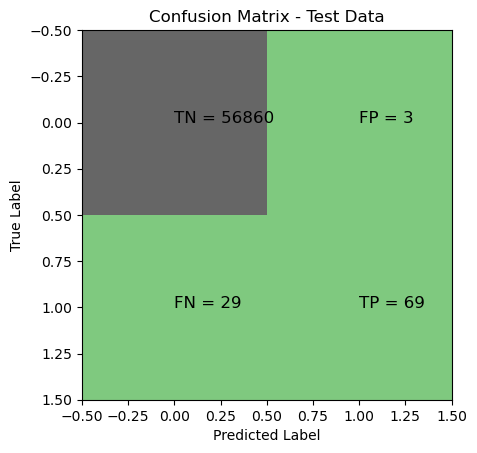

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost_roc_value: 0.9722049451474309
XGBoost threshold: 3.768169699469581e-05
time taken by model: ---2.8011703491210938 seconds ---
------------------------------------------------------------


In [41]:
#XGBoost model
print("XGBoost Model")
start_time=time.time()
results=XGBoostmodel(results,"StratifiedKFold Cross validation",X_train_SKF_cv,X_test_SKF_cv,Y_train_SKF_cv,Y_test_SKF_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)

SVM Model
Confusion Matrix


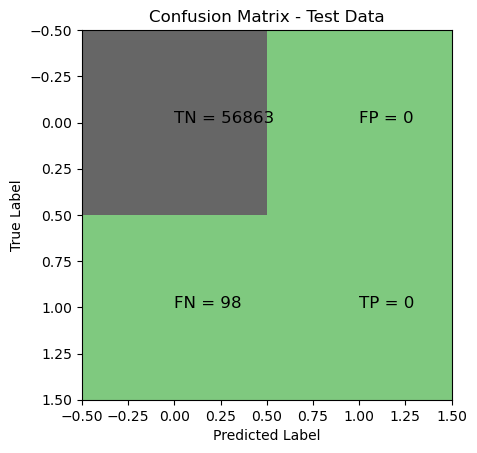

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM_roc_value: 0.40177034885494567
SVM threshold: 0.004330187740911087
time taken by model: ---216.42438864707947 seconds ---
------------------------------------------------------------


In [42]:
#SVM model
print("SVM Model")
start_time=time.time()
results=SVMmodel(results,"StratifiedKFold Cross validation",X_train_SKF_cv,X_test_SKF_cv,Y_train_SKF_cv,Y_test_SKF_cv)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)

In [43]:
#checking the results dataframe
results

,Methodology,Model,Accuracy,roc_value,Threshold
0,RepeatedKFold Cross validation,Logistic Regression with L1 regularisation,0.999122,0.918748,0.054333
1,RepeatedKFold Cross validation,Logistic Regression with L2 regularisation,0.999175,0.986403,0.002160
2,RepeatedKFold Cross validation,KNN,0.999350,0.907030,0.200000
3,RepeatedKFold Cross validation,Tree Model with gini criteria,0.999034,0.906891,1.000000
4,RepeatedKFold Cross validation,Tree Model with entropy criteria,0.999228,0.937863,1.000000
5,RepeatedKFold Cross validation,Random Forest,0.999631,0.973048,0.010000
6,RepeatedKFold Cross validation,XGBoost,0.999666,0.983353,0.000244
7,RepeatedKFold Cross validation,SVM,0.998385,0.513285,0.003033
8,StratifiedKFold Cross validation,Logistic Regression with L1 regularisation,0.998754,0.889076,0.021087
9,StratifiedKFold Cross validation,Logistic Regression with L2 regularisation,0.998771,0.983423,0.001542


## Random Oversampling using StratifiedKFold CV

In [45]:
#creating dataset with RandomOversampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf=StratifiedKFold(n_splits=5,random_state=None)

for fold,(train_index, test_index) in enumerate(skf.split(X,Y),1):
    X_train=X.iloc[train_index]
    Y_train=Y.iloc[train_index]
    X_test=X.iloc[test_index]
    Y_test=Y.iloc[test_index]
    ROS=RandomOverSampler(sampling_strategy=0.5)
    X_over, Y_over = ROS.fit_resample(X_train, Y_train)
    
X_over = pd.DataFrame(data=X_over, columns=cols)
    

In [30]:
pip install imbalanced-learn



     -------------------------------------- 258.0/258.0 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 301.2/301.2 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


Logistic regression
Accuracy of Logistic model with L1 regularisation: 0.9982795245869981
Confusion Matrix


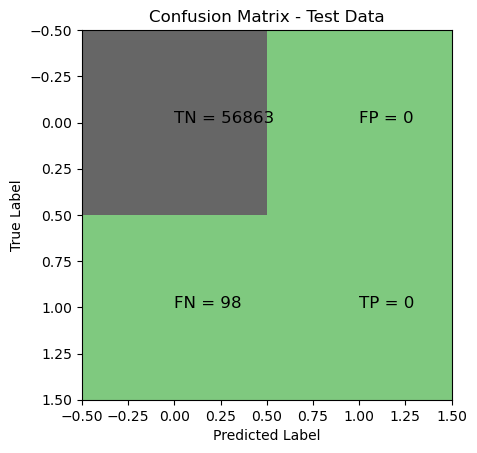

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with L2 regularisation: 0.9863239760537912
Confusion Matrix


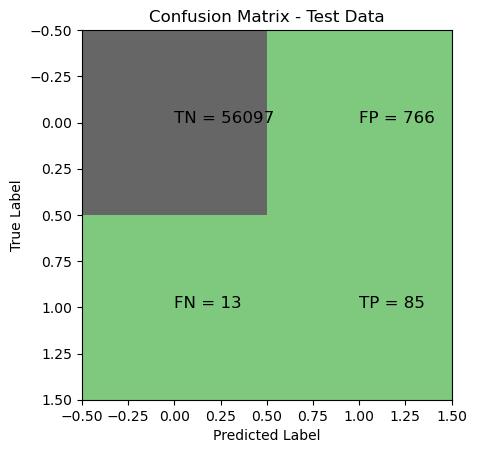

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.59     56961
weighted avg       1.00      0.99      0.99     56961

L1 roc_value: 0.5
L1 threshold: 1.5
l2 roc_value: 0.9806453893658479
L2 threshold: 0.43039231855259763
time taken by model: ---287.1068980693817 seconds ---
------------------------------------------------------------


In [46]:
Data_Imbalance_Handling = "Random Oversampling with stratifiedKFold CV"
#Logistic regression with l1 and L2 regularisation
print("Logistic regression")
start_time=time.time()
results=Logisticmodel(results,Data_Imbalance_Handling,X_over,X_test,Y_over,Y_test)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)

KNN Model
Confusion Matrix


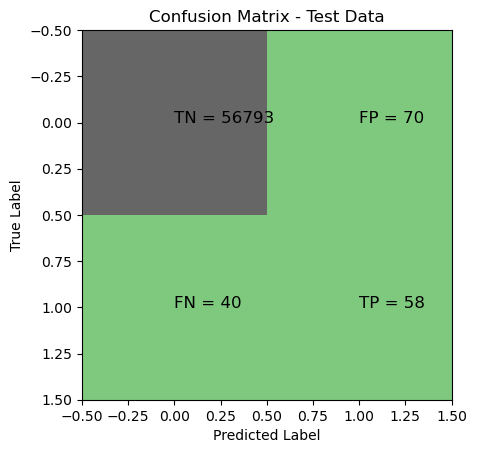

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
time taken by model: ---1124.459397315979 seconds ---
------------------------------------------------------------


In [47]:
Data_Imbalance_Handling = "Random Oversampling with stratifiedKFold CV"
#KNN model
print("KNN Model")
start_time=time.time()
results=KNNmodel(results,Data_Imbalance_Handling,X_over,X_test,Y_over,Y_test)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)

Decision Tree Model
Confusion Matrix


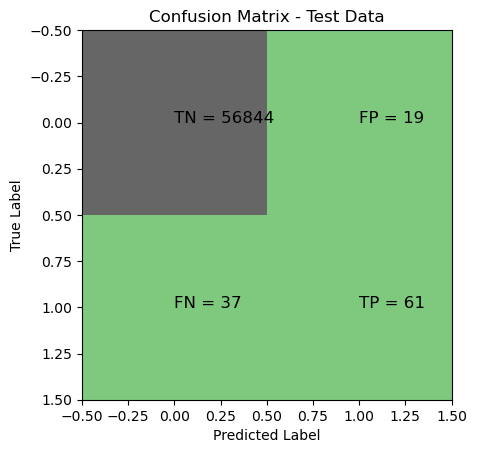

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.76      0.62      0.69        98

    accuracy                           1.00     56961
   macro avg       0.88      0.81      0.84     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value: 0.8110574215793277
Tree threshold: 1.0
Confusion Matrix


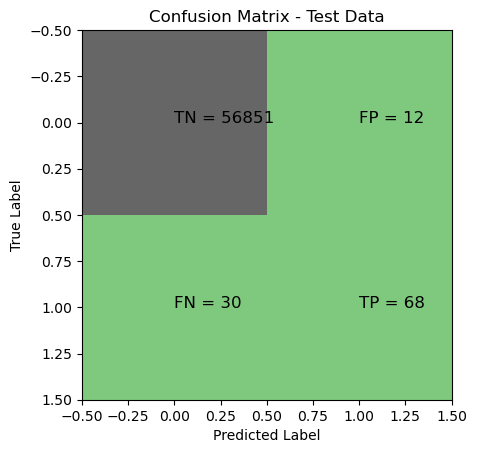

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.69      0.76        98

    accuracy                           1.00     56961
   macro avg       0.92      0.85      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value: 0.8468332587418309
Tree threshold: 1.0
time taken by model: ---18.65556311607361 seconds ---
------------------------------------------------------------


In [48]:
Data_Imbalance_Handling = "Random Oversampling with stratifiedKFold CV"
#Decision Tree models with gini and entropy
print("Decision Tree Model")
start_time=time.time()
results=Treemodel(results,Data_Imbalance_Handling,X_over,X_test,Y_over,Y_test)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)

Random Forest Model
Confusion Matrix


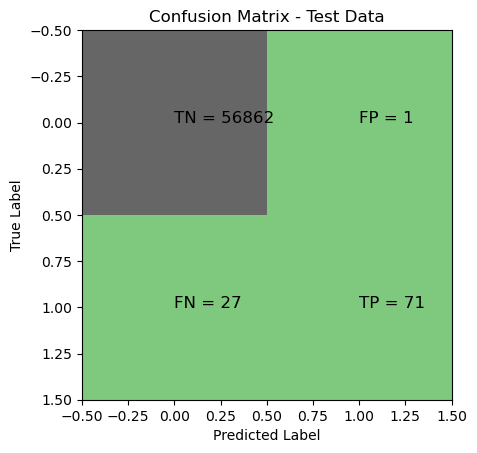

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random_Forest_roc_value: 0.9305035698045463
Random Forest threshold: 0.03
time taken by model: ---137.9723653793335 seconds ---
------------------------------------------------------------


In [49]:
Data_Imbalance_Handling = "Random Oversampling with stratifiedKFold CV"
#Random forest model
print("Random Forest Model")
start_time=time.time()
results=RandomForestmodel(results,Data_Imbalance_Handling,X_over,X_test,Y_over,Y_test)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)

XGBoost Model
Confusion Matrix


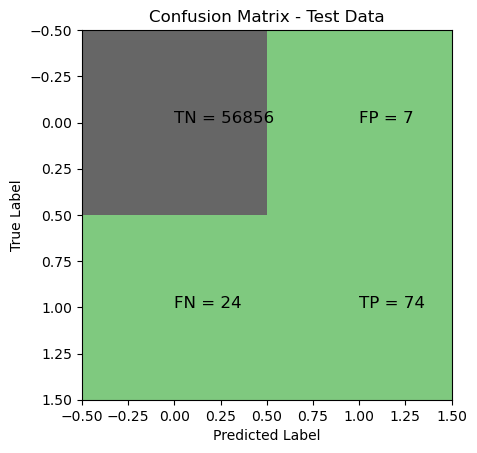

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.76      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost_roc_value: 0.9721588264238393
XGBoost threshold: 0.0001782142062438652
time taken by model: ---2.279963731765747 seconds ---
------------------------------------------------------------


In [50]:
Data_Imbalance_Handling = "Random Oversampling with stratifiedKFold CV"
#XGBoost model
print("XGBoost Model")
start_time=time.time()
results=XGBoostmodel(results,Data_Imbalance_Handling,X_over,X_test,Y_over,Y_test)
print("time taken by model: ---%s seconds ---" %(time.time()-start_time))
print('-'*60)

In [52]:
#checking the results dataframe
results

,Methodology,Model,Accuracy,roc_value,Threshold
0,RepeatedKFold Cross validation,Logistic Regression with L1 regularisation,0.999122,0.918748,0.054333
1,RepeatedKFold Cross validation,Logistic Regression with L2 regularisation,0.999175,0.986403,0.002160
2,RepeatedKFold Cross validation,KNN,0.999350,0.907030,0.200000
3,RepeatedKFold Cross validation,Tree Model with gini criteria,0.999034,0.906891,1.000000
4,RepeatedKFold Cross validation,Tree Model with entropy criteria,0.999228,0.937863,1.000000
5,RepeatedKFold Cross validation,Random Forest,0.999631,0.973048,0.010000
6,RepeatedKFold Cross validation,XGBoost,0.999666,0.983353,0.000244
7,RepeatedKFold Cross validation,SVM,0.998385,0.513285,0.003033
8,StratifiedKFold Cross validation,Logistic Regression with L1 regularisation,0.998754,0.889076,0.021087
9,StratifiedKFold Cross validation,Logistic Regression with L2 regularisation,0.998771,0.983423,0.001542


#### It's interesting to note that Logistic Regression with L2 regularization and XGBoost, both utilizing the RepeatedKFold cross-validation method, outperform the StratifiedKFold cross-validation method. Additionally, they even outperform the approach of random oversampling combined with StratifiedKFold cross-validation. This suggests that the RepeatedKFold method might be better suited for this particular dataset 